# Simulating ARIMAX Time Series With Exogenous Variables and Seasonality

## 1) Import Modules

In [2]:
### Import Modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
from data_simulation.SARIMAX_sim_class import SARIMAX_Simulation

## 2) Simulation Settings

In [4]:
### Set number of periods
start = "01/2004"
end = "12/2023"

# or:
#years = 10
#nsimulations = years * 12 

### Directory to store simulated data
sim_dir = r'C:/Users/Work/OneDrive/GAU/3. Semester/Statistisches Praktikum/Git/Ensemble-Techniques-TS-Forecasting/Data/Simulations/'

# path_X = os.path.join(sim_dir, 'X')
# path_Y = os.path.join(sim_dir, 'Y')

### Set Seed
seed = 42

## 3) Simulations: Exogenous

### 3.1) Exogenous Variable 1

#### 3.1.1) Parameters

In [253]:
# Make sure you define all coefficients you need, when changing the model order!
# Leave empty when not defined

# Trend
trend = True
trend_value = 0.94

# ARIMA
order = (1, 1, 3) # p, d, q
ar_coefs = [0.2]
ma_coefs = [0.4, 0.25, 0.1]

# Seasonal Component
seasonal_order = (2, 0, 0, 12) # P, D, Q, m
sar_coefs = [0.05, 0.01]
sma_coefs = []

# Error Term (Shock) Variance
shock_sigma2 = 100

# Bound Series?
bounded = True
lower_bound = 200
upper_bound = 500  


#### 3.1.2) Model and Simulation

In [254]:
exo1_model = SARIMAX_Simulation(
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

print(exo1_model.param_names)
print(exo1_model.params)

2014-01-01 00:00:00
['intercept', 'ar.L1', 'ma.L1', 'ma.L2', 'ma.L3', 'ar.S.L12', 'ar.S.L24', 'sigma2']
[0.94, 0.2, 0.4, 0.25, 0.1, 0.05, 0.01, 100]


In [255]:
exo1_ts = exo1_model.simulate(seed)

exo1_ts

Month
2014-01    334.328561
2014-02    364.997738
2014-03    410.263965
2014-04    424.036276
2014-05    429.869812
              ...    
2024-08    212.848188
2024-09    200.000000
2024-10    219.677314
2024-11    243.478382
2024-12    275.070724
Freq: M, Name: simulated_data, Length: 132, dtype: float64

### 3.2) Exogenous Variable 2

#### 3.2.1) Parameters

In [256]:
# Trend
trend = False
trend_value = -0.1

# ARIMA (p,d,q)
order = (2, 1, 4)
ar_coefs = [0.7, 0.01]
ma_coefs = [0.5, 0.2, 0.1, -0.1]

# Seasonal Component (P,D,Q,m)
seasonal_order = (1, 0, 0, 12)
sar_coefs = [0.2]
sma_coefs = []

# Error Term (Shock) Variance
shock_sigma2 = 1

# Bound Series?
bounded = True
lower_bound = 40
upper_bound = 80   

#### 3.2.2.) Model and Simulation

In [257]:
exo2_model = SARIMAX_Simulation(
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

print(exo2_model.param_names)
print(exo2_model.params)

2014-01-01 00:00:00
['ar.L1', 'ar.L2', 'ma.L1', 'ma.L2', 'ma.L3', 'ma.L4', 'ar.S.L12', 'sigma2']
[0.7, 0.01, 0.5, 0.2, 0.1, -0.1, 0.2, 1]


In [258]:
exo2_ts = exo2_model.simulate(seed)
exo2_ts

Month
2014-01    68.682500
2014-02    67.473447
2014-03    67.833787
2014-04    68.388270
2014-05    71.615911
             ...    
2024-08    63.567656
2024-09    63.356051
2024-10    61.811347
2024-11    60.278053
2024-12    59.801573
Freq: M, Name: simulated_data, Length: 132, dtype: float64

### 3.3) Exogenous Variable 3

#### 3.3.1) Parameters

In [259]:
# Trend
trend = True
trend_value = 0.1

# ARIMA (p,d,q)
order = (3, 1, 1)
ar_coefs = [0.15, -0.01, -0.01]
ma_coefs = [0.35]

# Seasonal Component (P,D,Q,m)
seasonal_order = (2, 0, 1, 12)
sar_coefs = [0.3, 0.2]
sma_coefs = [-0.2]

# Error Term (Shock) Variance
shock_sigma2 = 4

# Bound Series?
bounded = True
lower_bound = 900
upper_bound = 950   

#### 3.3.2) Model and Simulation

In [260]:
exo3_model = SARIMAX_Simulation(
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

print(exo3_model.param_names)
print(exo3_model.params)

2014-01-01 00:00:00
['intercept', 'ar.L1', 'ar.L2', 'ar.L3', 'ma.L1', 'ar.S.L12', 'ar.S.L24', 'ma.S.L12', 'sigma2']
[0.1, 0.15, -0.01, -0.01, 0.35, 0.3, 0.2, -0.2, 4]


In [261]:
exo3_ts = exo3_model.simulate(seed)
exo3_ts

Month
2014-01    900.000000
2014-02    905.298091
2014-03    903.086605
2014-04    908.835578
2014-05    911.113405
              ...    
2024-08    932.881588
2024-09    934.951431
2024-10    939.705469
2024-11    935.090226
2024-12    939.205981
Freq: M, Name: simulated_data, Length: 132, dtype: float64

## 4) Simulation: Endogenous

### 4.1) Parameters

In [262]:
# Exogenous Variables
exog = [exo1_ts, exo2_ts, exo3_ts]
exog_coefs = [0.3, 0.15, -0.1]

# Trend
trend = True
trend_value = 0.1

# ARIMA (p,d,q)
order = (1, 1, 5)
ar_coefs = [0.4]
ma_coefs = [0.15, 0.05, -0.005, -0.01, -0.01]

# Seasonal Component (P,D,Q,m)
seasonal_order = (4, 0, 0, 6)
sar_coefs = [0.1, -0.1, 0.05, -0.01]
sma_coefs = []

# Error Term (Shock) Variance
shock_sigma2 = 5

# Bound Series?
bounded = True
lower_bound = 40
upper_bound = 90

### 4.2) Model and Simulation

In [263]:
endo_model = SARIMAX_Simulation(
        exog = exog,
        exog_coefs = exog_coefs,
        start = start,
        end = end,
        order = order, seasonal_order = seasonal_order, trend = trend, trend_value = trend_value, 
        ar_coefs = ar_coefs, ma_coefs = ma_coefs, 
        sar_coefs = sar_coefs, sma_coefs = sma_coefs, 
        shock_sigma2 = shock_sigma2,
        bounded = bounded, lower_bound = lower_bound, upper_bound = upper_bound)

print(endo_model.param_names)
print(endo_model.params)

2014-01-01 00:00:00
['intercept', 'simulated_data', 'simulated_data', 'simulated_data', 'ar.L1', 'ma.L1', 'ma.L2', 'ma.L3', 'ma.L4', 'ma.L5', 'ar.S.L6', 'ar.S.L12', 'ar.S.L18', 'ar.S.L24', 'sigma2']
[0.1, 0.3, 0.15, -0.1, 0.4, 0.15, 0.05, -0.005, -0.01, -0.01, 0.1, -0.1, 0.05, -0.01, 5]


In [264]:
endo_ts = endo_model.simulate(seed)
endo_ts 

Month
2014-01    50.457906
2014-02    57.911185
2014-03    65.120215
2014-04    70.180883
2014-05    68.942282
             ...    
2024-08    72.499773
2024-09    71.089154
2024-10    74.750031
2024-11    78.478318
2024-12    82.480178
Freq: M, Name: simulated_data, Length: 132, dtype: float64

## 5) Plot Data

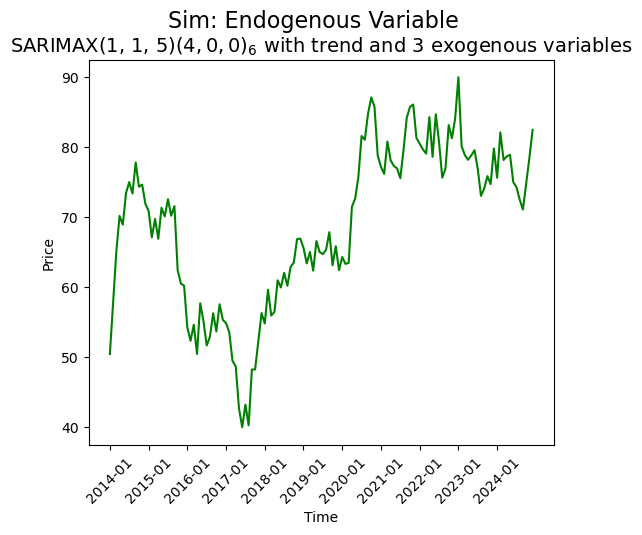

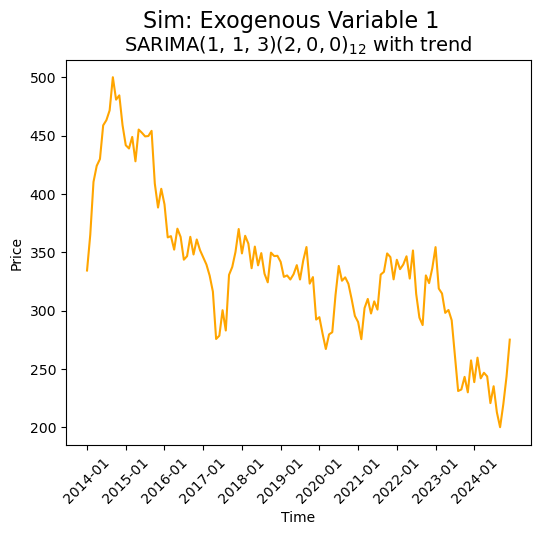

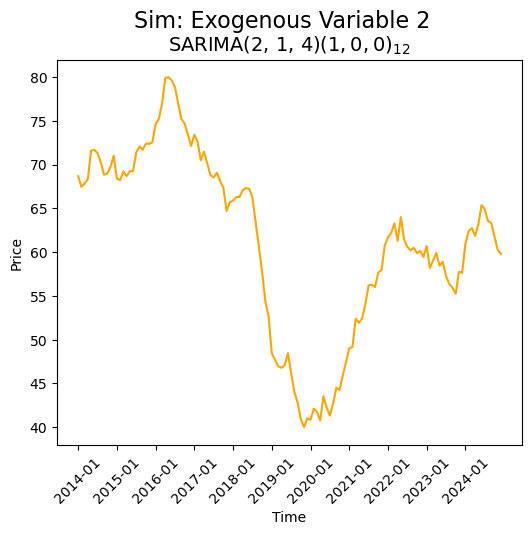

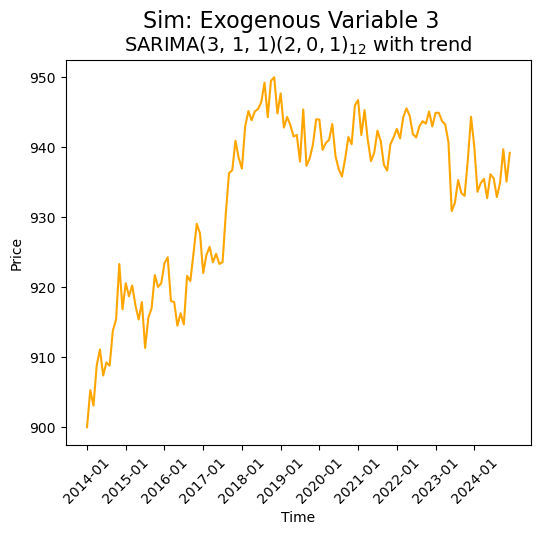

In [265]:
endo_ts.plot("Sim: Endogenous Variable", color = "green")

for i, ts in enumerate([exo1_ts, exo2_ts, exo3_ts]):
    ts.plot(f"Sim: Exogenous Variable {i+1}", color = "orange")

## 5) Export Data

In [267]:
# endo_ts.to_csv(f'{path_Y}/y.csv')

# exo_ts = [exo1_ts, exo2_ts, exo3_ts]

# for ts in exo_ts:
#     filename = f'x{i}.csv'
#     ts.to_csv(f'{path_X}/{filename}')

# Assuming your series are already defined
# endo_ts, exo_ts1, exo_ts2, exo_ts3

# Concatenate the series into a dataframe
df = pd.concat([endo_ts, exo1_ts, exo2_ts, exo3_ts], axis=1)

# Rename Columns
df.columns = ['y', "x1", "x2", "x3"]

# Rename Index to 'Date'
df.index.name = "Date"
#df.insert(0, 'Date', endo_ts.index.to_series())

# Optionally, you can format the 'Date' column as 'MM-DD-YYYY'
df.index = df.index.to_timestamp().strftime('%d-%m-%Y')

# Display the resulting dataframe
print(df)

# Export as CSV
filename = f'simdata.csv'
df.to_csv(f'{sim_dir}{filename}')

                    y          x1         x2          x3
Date                                                    
01-01-2014  50.457906  334.328561  68.682500  900.000000
01-02-2014  57.911185  364.997738  67.473447  905.298091
01-03-2014  65.120215  410.263965  67.833787  903.086605
01-04-2014  70.180883  424.036276  68.388270  908.835578
01-05-2014  68.942282  429.869812  71.615911  911.113405
...               ...         ...        ...         ...
01-08-2024  72.499773  212.848188  63.567656  932.881588
01-09-2024  71.089154  200.000000  63.356051  934.951431
01-10-2024  74.750031  219.677314  61.811347  939.705469
01-11-2024  78.478318  243.478382  60.278053  935.090226
01-12-2024  82.480178  275.070724  59.801573  939.205981

[132 rows x 4 columns]


## 6) Add Noise to Variables to Immitate Measurement Error

In [268]:
# hier nach später auch das Variablen bounding einfügen, da sinnvoller

In [269]:
# Define the range for mean and standard deviation
mean_range = (-0.8, 0.8)
std_dev_range = (0.2, 0.9)

# Create a list to store the noisy time series
noisy_series = []

# Loop through each original time series
for ts in [endo_ts, exo1_ts, exo2_ts, exo3_ts]:
    # Randomly draw mean and standard deviation
    mean = np.random.uniform(*mean_range)
    std_dev = np.random.uniform(*std_dev_range)
    
    # Generate random noise
    noise = np.random.normal(mean, std_dev, len(ts))
    
    # Add noise to the original time series
    noisy_ts = ts + noise
    
    # Append the noisy time series to the list
    noisy_series.append(noisy_ts)


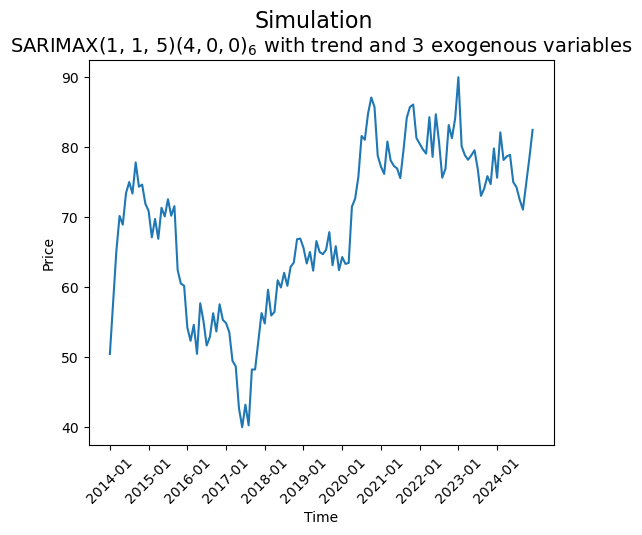

<Axes: xlabel='Month'>

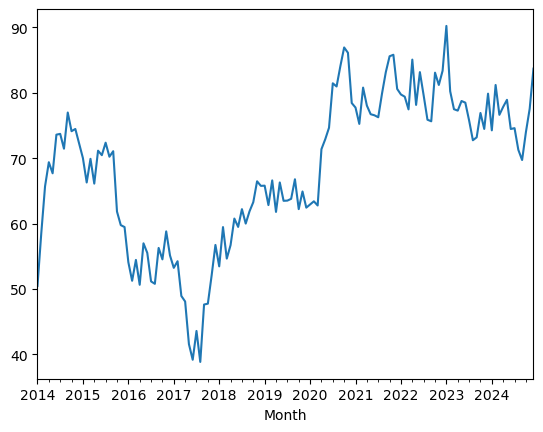

In [270]:

endo_ts.plot()
noisy_series[0].plot()

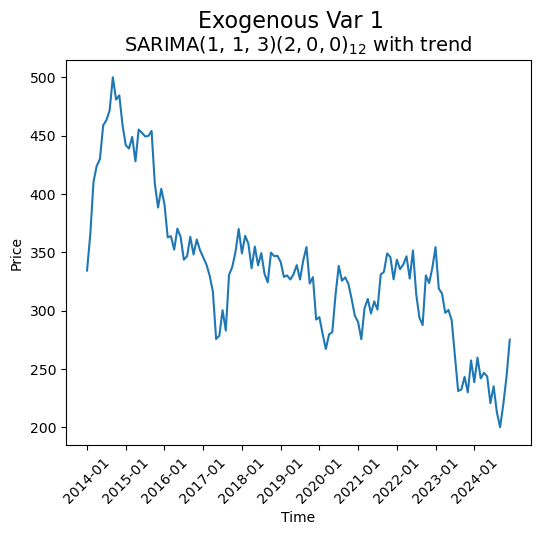

<Axes: title={'center': 'Exogenous Var 1 with noise'}, xlabel='Month'>

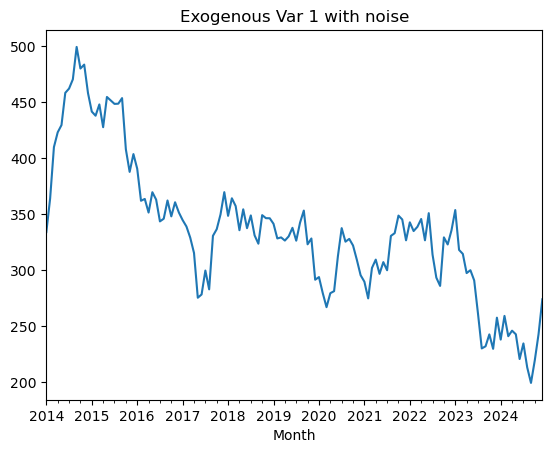

In [271]:
exo1_ts.plot("Exogenous Var 1")
noisy_series[1].plot(title = "Exogenous Var 1 with noise")

## 7) Export Noisy Data

In [272]:
# Create empty dataframe
noisy_df = pd.DataFrame()

for ts in noisy_series:
    
    # Concatenate the series to dataframe
    noisy_df = pd.concat([noisy_df, ts], axis=1)

# Rename Columns
noisy_df.columns = ['y', "x1", "x2", "x3"]

# Rename Index to 'Date'
noisy_df.index.name = "Date"
#noisy_df.insert(0, 'Date', endo_ts.index.to_series())

# Optionally, you can format the 'Date' column as 'MM-DD-YYYY'
noisy_df.index = pd.PeriodIndex(noisy_df.index, freq = "M").to_timestamp().strftime('%d-%m-%Y')

# Display the resulting dataframe
print(noisy_df)

# Export as CSV
filename = f'noisy_simdata.csv'
noisy_df.to_csv(f'{sim_dir}{filename}')

                    y          x1         x2          x3
Date                                                    
01-01-2014  50.462822  334.043423  67.667477  901.076127
01-02-2014  58.475673  364.080849  66.326956  905.641172
01-03-2014  65.687695  409.939731  66.938354  903.995482
01-04-2014  69.380289  423.199287  67.647591  909.105808
01-05-2014  67.683462  429.659809  71.831250  910.636342
...               ...         ...        ...         ...
01-08-2024  71.276070  213.036886  63.796875  933.776841
01-09-2024  69.717262  199.133163  62.960070  934.396389
01-10-2024  73.978551  219.275246  61.038563  941.066733
01-11-2024  77.563093  242.808125  59.768522  935.569471
01-12-2024  83.696095  273.915092  59.565512  939.673132

[132 rows x 4 columns]
